# 이미지 분류 신경망 모델 훈련

In [1]:
# tf.keras API 사용

from __future__ import absolute_import, division, print_function, unicode_literals

# tensorflow, tf.keras import

import tensorflow as tf
from tensorflow import keras

# import helper library

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.0


In [7]:
# MNIST Data set
# train_images, train_labels = 모델 학습에 사용되는 훈련 세트
# test_images, test_labels = 모델 테스트에 사용되는 테스트 세트

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



In [8]:
# 데이터 셋에 클래스 이름이 없기 때문에 별도의 변수를 만들어 저장.

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
                'Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [10]:
# 데이터셋 구조. 60,000개 이미지, 28 X 28 픽셀로 이루어짐

train_images.shape

(60000, 28, 28)

In [11]:
# 훈련 세트에는 60,000개의 레이블

len(train_labels)

60000

In [12]:
# 각 레이블은 0과 9 사이의 정수

train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
# 테스트 세트에는 10,000개 이미지, 28 X 28 픽셀로 이루어짐

test_images.shape

(10000, 28, 28)

In [17]:
# 테스트 세트는 10,000개의 레이블

len(test_labels)

10000

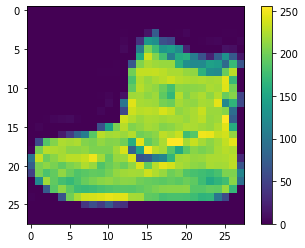

In [21]:
# 데이터 전처리
# 픽셀 값의 범위 0 ~ 255

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

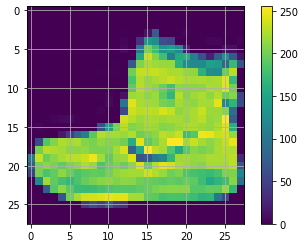

In [27]:
# plt.grid(True)로 했을 때

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

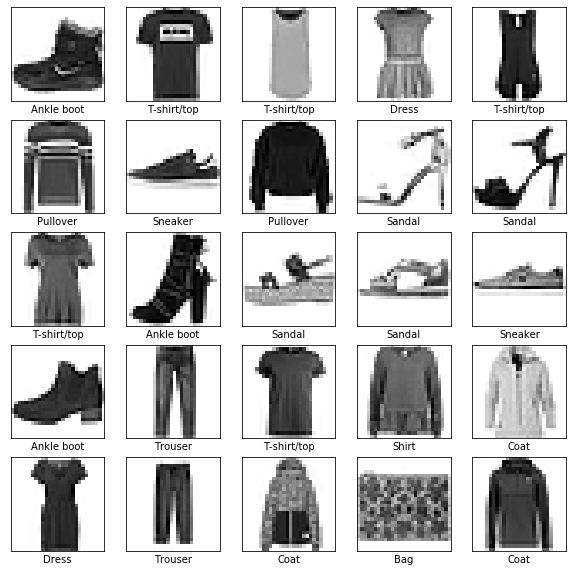

In [81]:
# 처음 25개 이미지와 그 아래 클래스 이름 출력.

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [82]:
# 모델의 층을 구성한 뒤 모델 컴파일

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# keras.layers.Flatten(input_shape=(28, 28)), = 1번째 층.
# 2차원배열의 이미지 포맷을 28 * 28 = 784 픽셀의 1차원 배열로 변환.

# keras.layers.Dense(128, activation='relu'), = 2번째 층.
# 밀집 연결 또는 완전 연결 층이라고 부름. 첫 번째 Dense 층은 128개의 노드(뉴런)을 가짐.
# 두 번째(마지막) 층은 10개의 노드의 소프트맥스 층.
# 이 층은 10개의 확률을 반환하고 반환된 값의 전체 합은 1이다.
# 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력함.

In [83]:
# Loss function - 모델의 오차 측정. 이 함수를 최소화 해야함.
# Optimizer - Data와 Loss function을 바탕으로 모델의 업데이트 방법을 결정.
# Metrics - 훈련 단계와 테스트 단계를 모니터링 하기 위해 사용된다.

model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# 모델 훈련

1. 훈련 데이터를 모델에 주입. (train_images, train_labels)
2. 모델이 이미지와 레이블을 매핑하는 방법을 배움
3. 테스트 세트에 대한 모델의 예측을 만든다. (test_images).
4. 이 예측이 test_labels 배열의 레이블과 맞는지 확인한다.

model.fit 메서드를 호출해 모델이 훈련 데이터를 학습한다.

In [99]:
model.fit(train_images, train_labels, epochs=5)

# 약 85%의 정확도이다.

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.4992 - acc: 0.8311
Epoch 2/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4838 - acc: 0.8381
Epoch 3/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4685 - acc: 0.8424
Epoch 4/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4749 - acc: 0.8418
Epoch 5/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.4742 - acc: 0.8417


In [85]:
# 정확도 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n테스트 정확도 : ', test_acc)
print('\n테스트 손실도 : ', test_loss)

10000/10000 - 0s - loss: 0.5602 - acc: 0.8248

테스트 정확도 :  0.8248

테스트 손실도 :  0.5602213683366776


테스트 세트의 정확도가 훈련 세트(train) 세트의 정확도보다 조금 낮음.
왜냐하면 과대적합.
과대적합 : 머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 현상을 말한다.

In [86]:

# 예측 만들기
# predictions = model.predict(test_images)

In [87]:
# 테스트 세트에 있는 각 이미지의 레이블을 예측.
# 10개의 숫자 배열로 나타나는데, 이 값은 10개의 옷 품목에 상응하는 모델의 신뢰도를 나타낸다.

predictions[0]

array([6.2403427e-26, 2.1155465e-18, 0.0000000e+00, 8.1142510e-22,
       0.0000000e+00, 4.5015728e-03, 0.0000000e+00, 6.3497759e-02,
       1.9765859e-15, 9.3200064e-01], dtype=float32)

In [88]:
# 가장 높은 신뢰도
# class_name[9]인 앵클 부츠가 가장 높은 신뢰도를 나타내고 있다.

np.argmax(predictions[0])

9

In [89]:

test_labels[0]

9

# 10개 클래스에 대한 예측을 모두 그래프로 표현

In [90]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

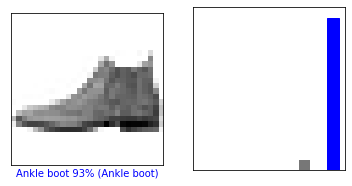

In [91]:
# 0 번째 원소의 이미지, 예측, 신뢰도 점수 배열 확인

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

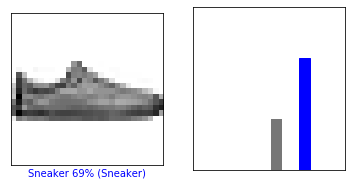

In [92]:
# 12 번째 원소의 이미지, 예측, 신뢰도 점수 배열 확인

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

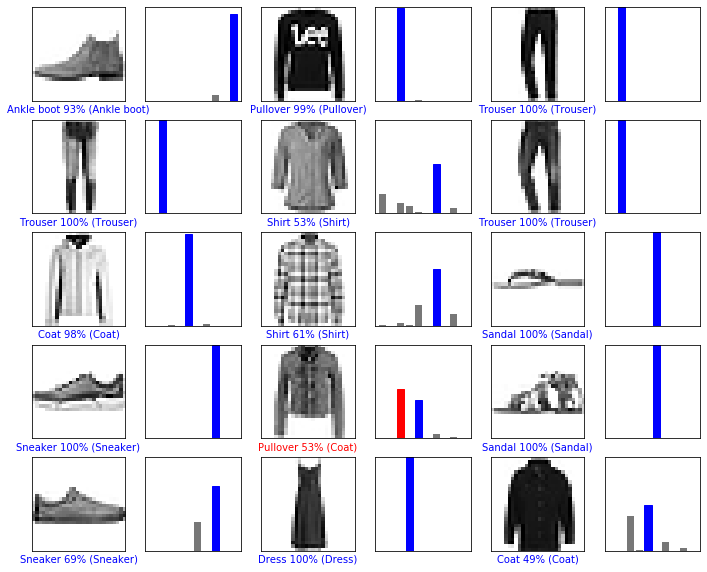

In [93]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [94]:

# 테스트 세트에서 이미지 하나를 선택

img = test_images[0]

print(img.shape)

(28, 28)


In [95]:
# 하나의 이미지를 사용할 때에도 배치에 추가. 2차원 배열로 만든다.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [96]:
# 위 이미지(img)의 예측을 만든다.

predictions_single = model.predict(img)
print(predictions_single)

[[3.1116636e-27 0.0000000e+00 0.0000000e+00 7.9693909e-31 8.8610905e-35
  1.9413853e-04 6.4277249e-36 2.7649786e-02 1.5423189e-13 9.7215605e-01]]


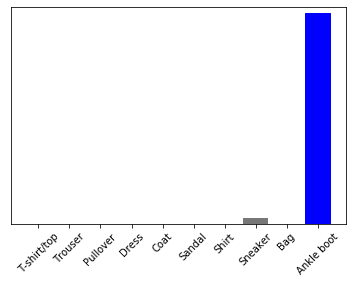

In [97]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [98]:
np.argmax(predictions_single[0])

9